**Завдання**
### Протестуйте описані в лекції методи і моделі на датасеті **AirPassengers.csv**.
### Порівняйте метрики оцінки моделі для двох датасетів.

In [43]:
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [44]:
df_airpass = pd.read_csv('AirPassengers.csv')
print('BEFORE making a "Month" column as an index column:')
df_airpass

BEFORE making a "Month" column as an index column:


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [45]:
df_airpass.isnull().sum()


Month          0
#Passengers    0
dtype: int64

In [46]:
# Rename a column '#Passengers' to 'Passengers'.
df_airpass.rename({'#Passengers': 'Passengers'}, axis=1, inplace=True)


In [47]:
# Index definition.
idx = df_airpass['Month']

# Converting 'Month' with object type (str type) into 'int' type.
df_airpass['Month'] = pd.to_datetime(df_airpass['Month'])


In [48]:
# Making 'Month' as an index column.
df_airpass.set_index('Month', inplace=True)
print('AFTER: "Month" is an index now:')
print(df_airpass)


AFTER: "Month" is an index now:
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]


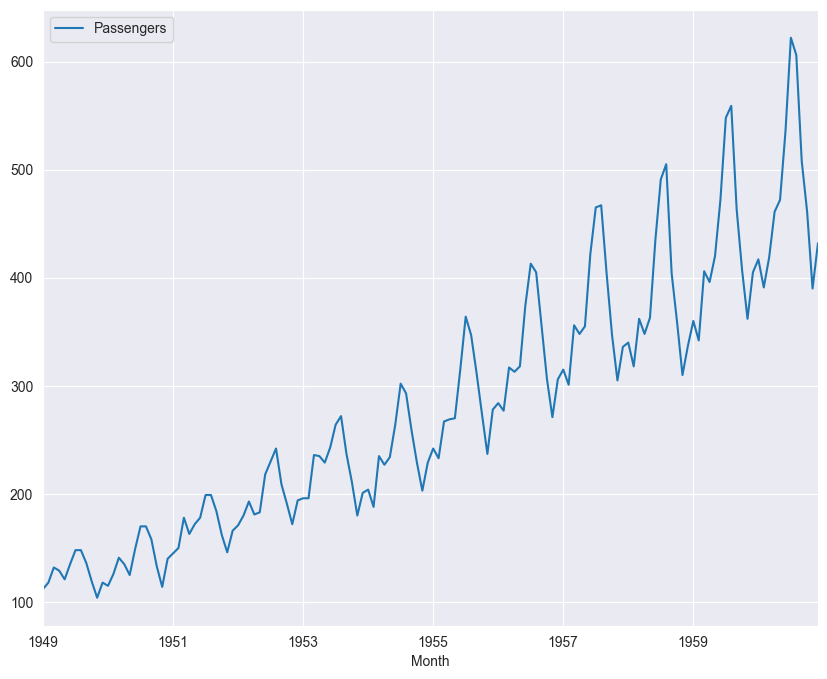

In [49]:
# Visualisation the AirPassengers datasets.
matplotlib.rcParams['figure.figsize'] = [10, 8]
df_airpass.plot()
plt.show()


In [52]:
# Making 'acf' correlation.
acf_corr = acf(df_airpass.Passengers)
acf_corr


array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

In [53]:
# Making 'pacf' correlation.
pacf_corr = pacf(df_airpass.Passengers)
pacf_corr


array([ 1.        ,  0.95467704, -0.26527732,  0.05546955,  0.10885622,
        0.08112579,  0.00412541,  0.15616955,  0.10370833,  0.28878144,
        0.20691805,  0.2411297 , -0.15800498, -0.7183246 , -0.08948064,
        0.22160591,  0.13462253,  0.11561572,  0.1948294 ,  0.09665618,
       -0.20215868, -0.0936381 ])

<AxesSubplot: ylabel='Month'>

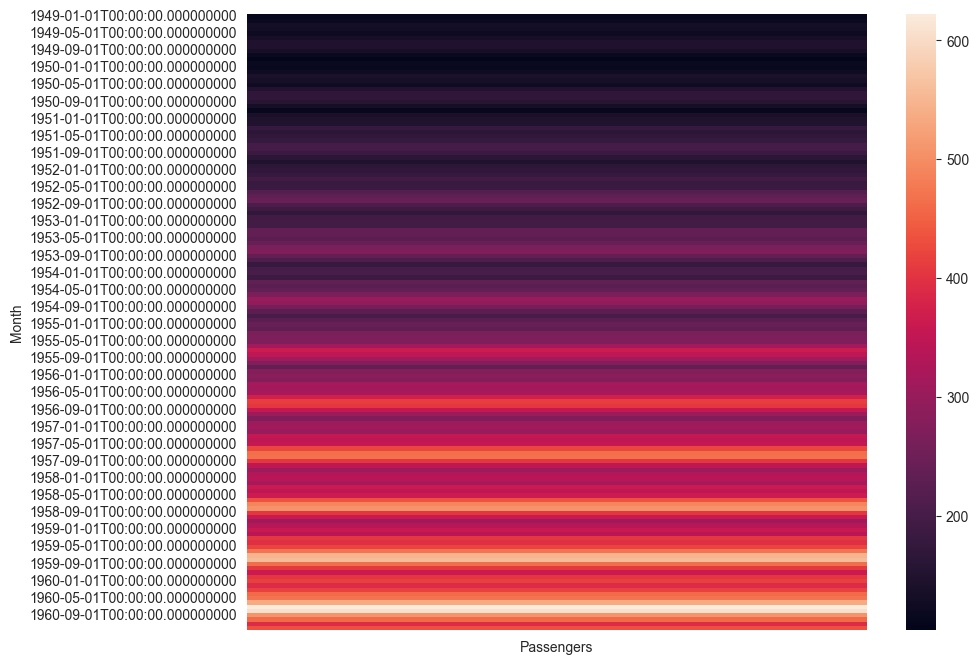

In [54]:
# Heatmap correlation.
import seaborn as sns

sns.heatmap(df_airpass)
